In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "images/box.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

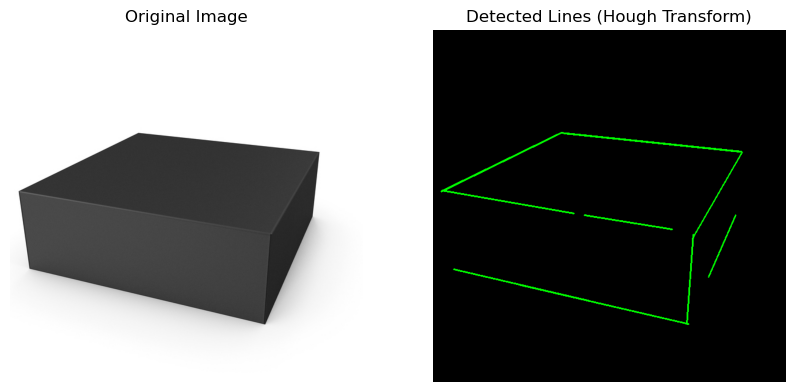

In [18]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)
line_img = np.zeros_like(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines (Hough Transform)")
plt.axis("off")
plt.show()

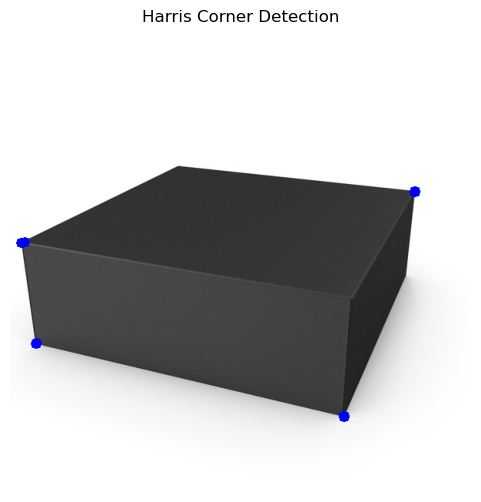

In [19]:
dst = cv2.cornerHarris(image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  
image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  
for y, x in np.argwhere(dst > 0.01 * dst.max()):
    cv2.circle(image_with_corners, (x, y), 5, (0, 0, 255), -1)
plt.figure(figsize=(6, 6))
plt.imshow(image_with_corners)
plt.title('Harris Corner Detection')
plt.axis('off')  
plt.show()